In [1]:
import sys
sys.path.append("../../")

In [2]:
import random
import numpy as np
import torch
from botorch.utils.sampling import draw_sobol_samples
from botorch.test_functions.multi_objective import GMM, BraninCurrin, DTLZ3, Penicillin

tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cpu"),
}
SEED = 43
# Setting seed for reproducibility
random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

In [3]:
# define problem
# problem = DTLZ3(dim=3, negate=True).to(**tkwargs)
# problem = BraninCurrin(negate=True).to(**tkwargs)
problem = GMM(negate=True).to(**tkwargs)
# problem.ref_point = torch.tensor([0., 0.], **tkwargs)

## Problem

The approximated pareto set and pareto front is shown in the following figure.

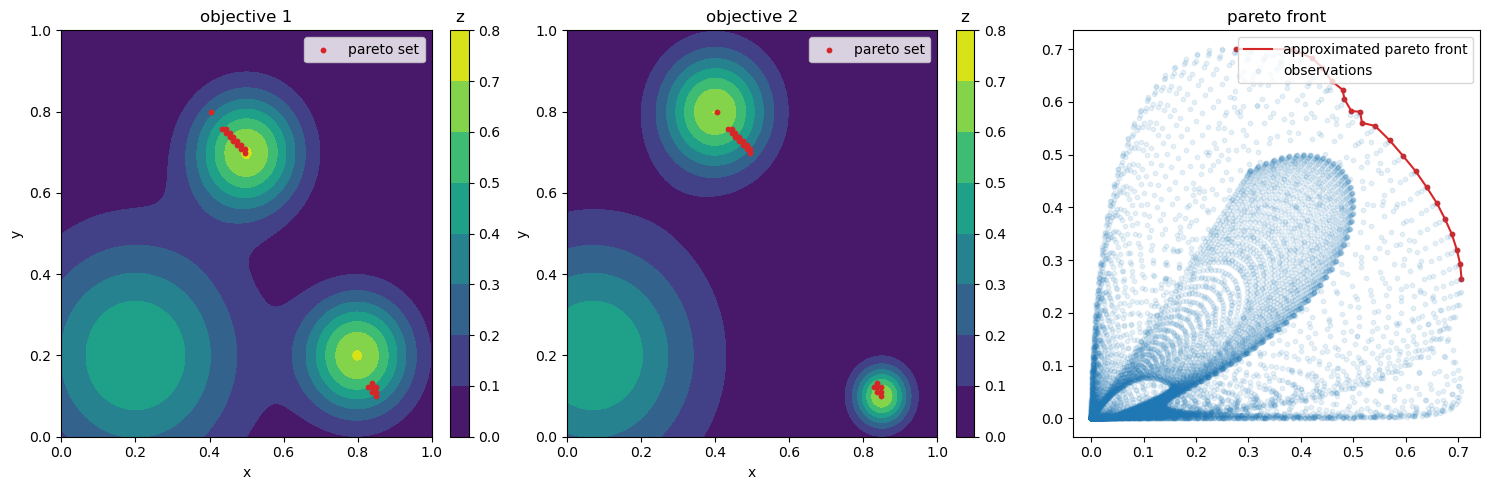

In [4]:
from plot_utils import plot_objective

plot_objective(problem, num_samples=100)

In [5]:
def generate_initial_data(problem, n=6):
    # generate training data
    train_x = draw_sobol_samples(bounds=problem.bounds, n=n, q=1).squeeze(1)
    train_obj = problem(train_x)
    return train_x, train_obj

In [6]:
init_x, init_y = generate_initial_data(problem, n=20)
                                    #    3*(problem.dim+1))

## Generate data

In [7]:
from optimizers.mbore.mbore_composite import MBORE_COMPOSITE
from optimizers.mbore.mbore import MBORE
from optimizers.mbore.mbore_mlp import MBORE_MLP
from optimizers.mbore.mbore_mdre_ei import MBORE_MDRE_EI
from optimizers.mbore.mbore_mdre_ei_aux import MBORE_MDRE_EI_AUX
from optimizers.mbore.mbore_mdre_ei_aux_random import MBORE_MDRE_EI_AUX_RANDOM

In [8]:
optimizer = MBORE_COMPOSITE(
    problem=problem,
    debug=True
)

2024-07-12 14:56:18,401 | optimizers.mbore.mbore_composite


2024-07-12 14:56:18,415 | optimizers.mbore.mbore_composite


Iteration 0
tau: 0.0


2024-07-12 14:56:30,336 | Model fitting takes 11.92s
2024-07-12 14:56:31,173 | Optimizing the acquisition function takes 0.84s


Iteration 1
tau: -0.0


2024-07-12 14:56:40,012 | Model fitting takes 7.38s
2024-07-12 14:56:40,742 | Optimizing the acquisition function takes 0.73s


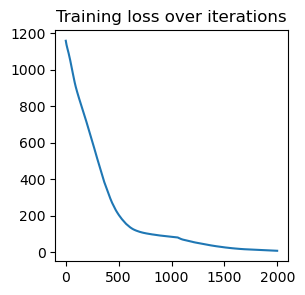

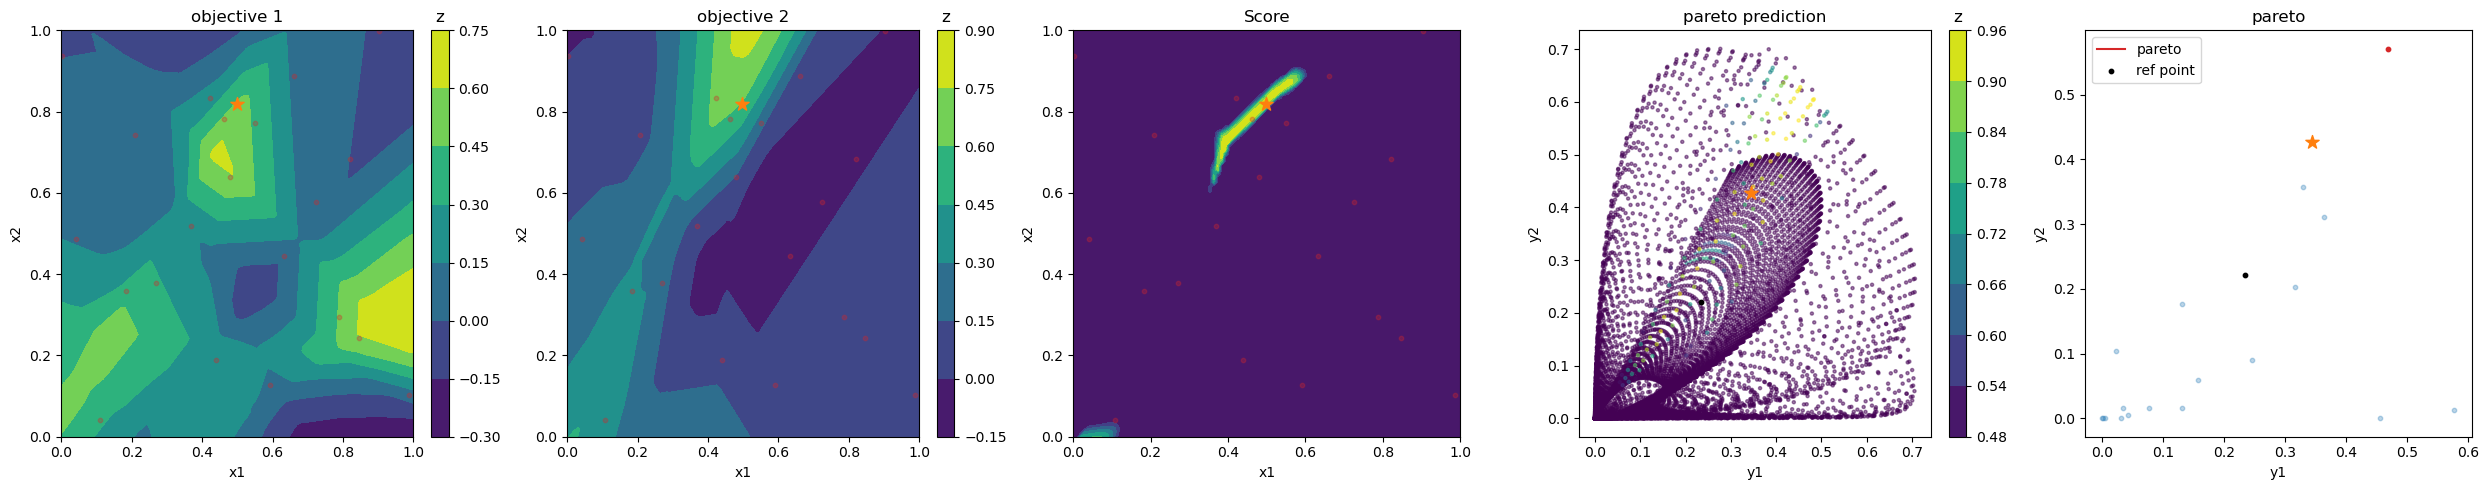

Iteration 2
tau: -0.0


2024-07-12 14:56:49,510 | Model fitting takes 7.33s
2024-07-12 14:56:50,225 | Optimizing the acquisition function takes 0.71s


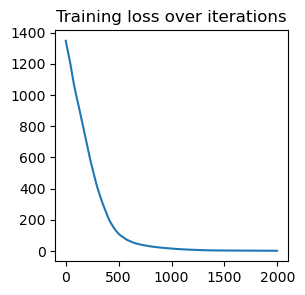

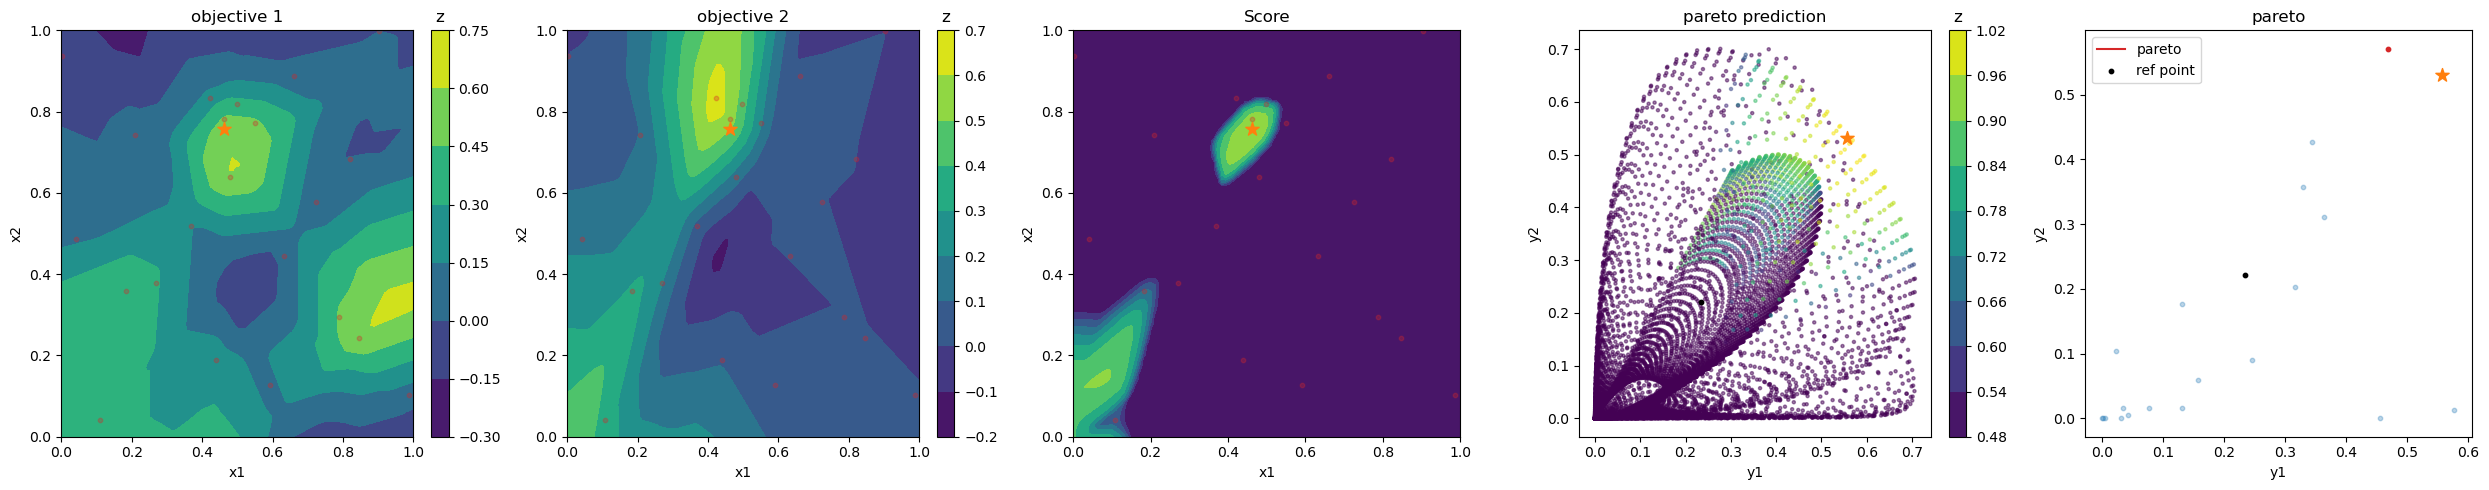

Iteration 3
tau: 0.0


2024-07-12 14:56:58,976 | Model fitting takes 7.27s
2024-07-12 14:56:58,999 | Optimizing the acquisition function takes 0.02s


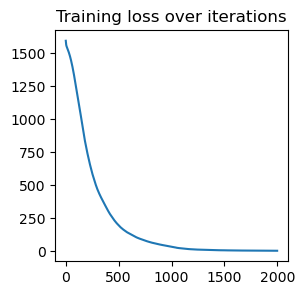

Iteration 4
tau: 0.0


2024-07-12 14:57:07,868 | Model fitting takes 7.26s
2024-07-12 14:57:07,890 | Optimizing the acquisition function takes 0.02s


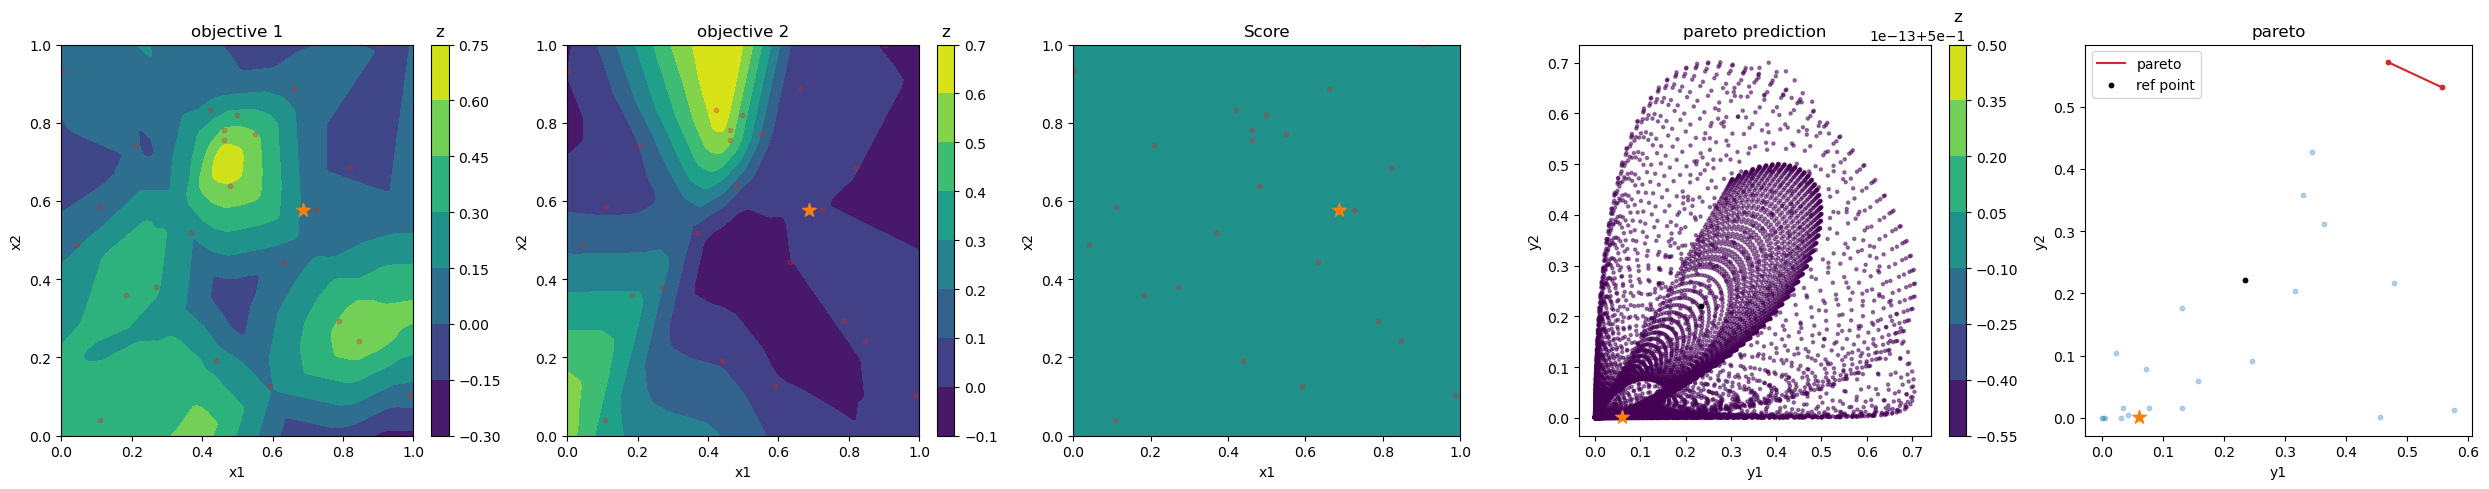

Iteration 5
tau: -0.0


2024-07-12 14:57:19,497 | Model fitting takes 9.13s
2024-07-12 14:57:19,520 | Optimizing the acquisition function takes 0.02s


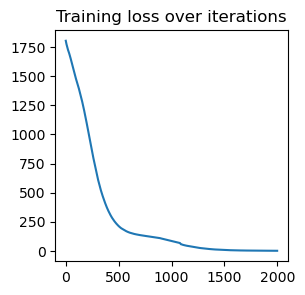

Iteration 6
tau: 0.0


2024-07-12 14:57:29,812 | Model fitting takes 8.53s
2024-07-12 14:57:29,831 | Optimizing the acquisition function takes 0.02s


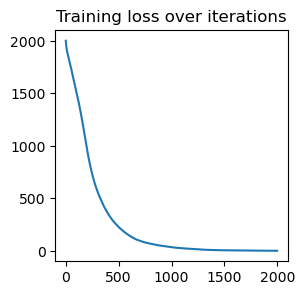

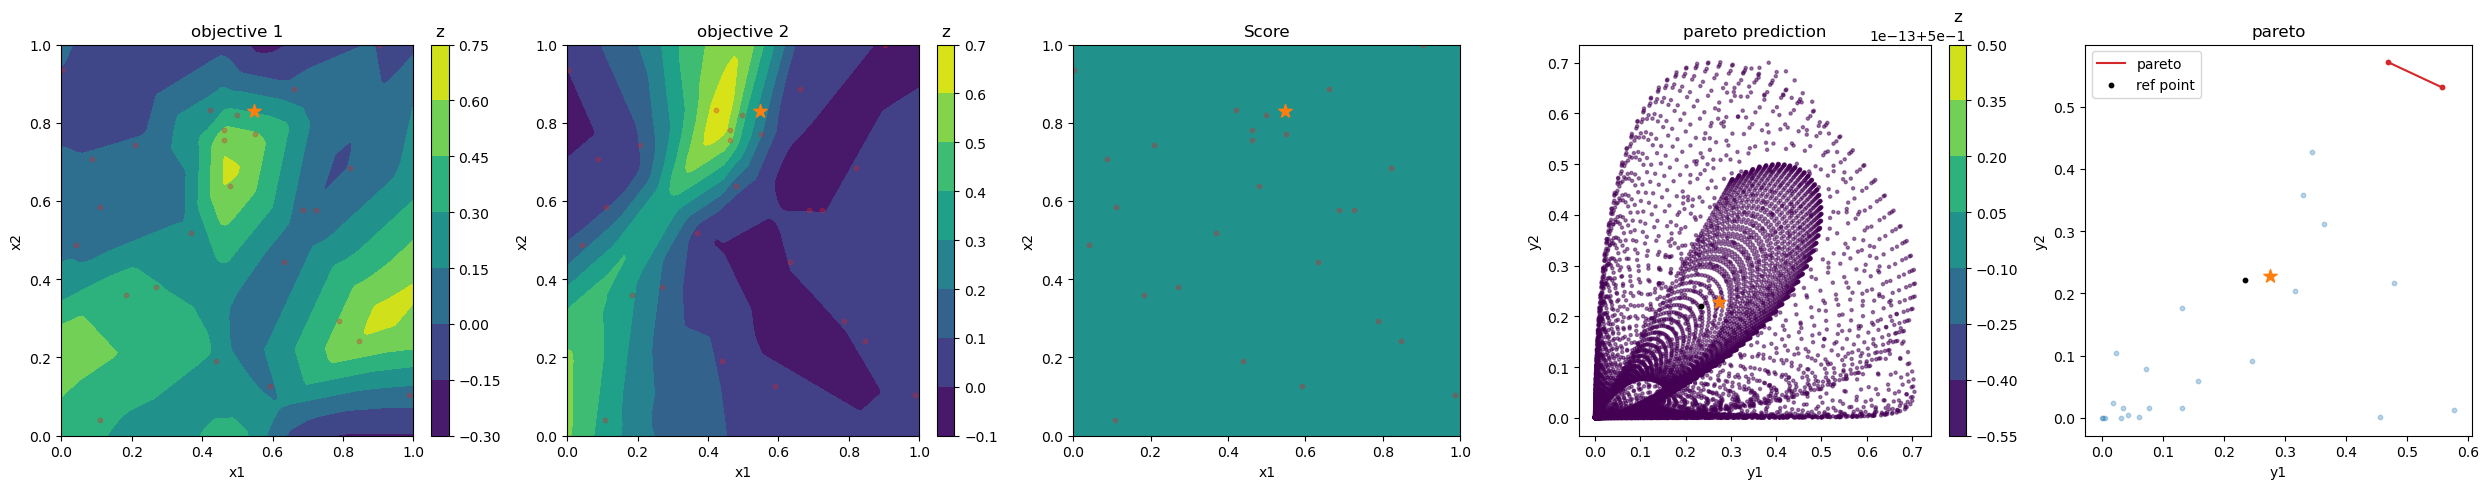

Iteration 7
tau: 0.0


2024-07-12 14:57:38,752 | Model fitting takes 7.24s
2024-07-12 14:57:38,771 | Optimizing the acquisition function takes 0.02s


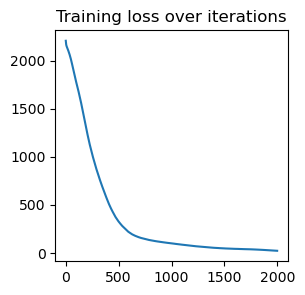

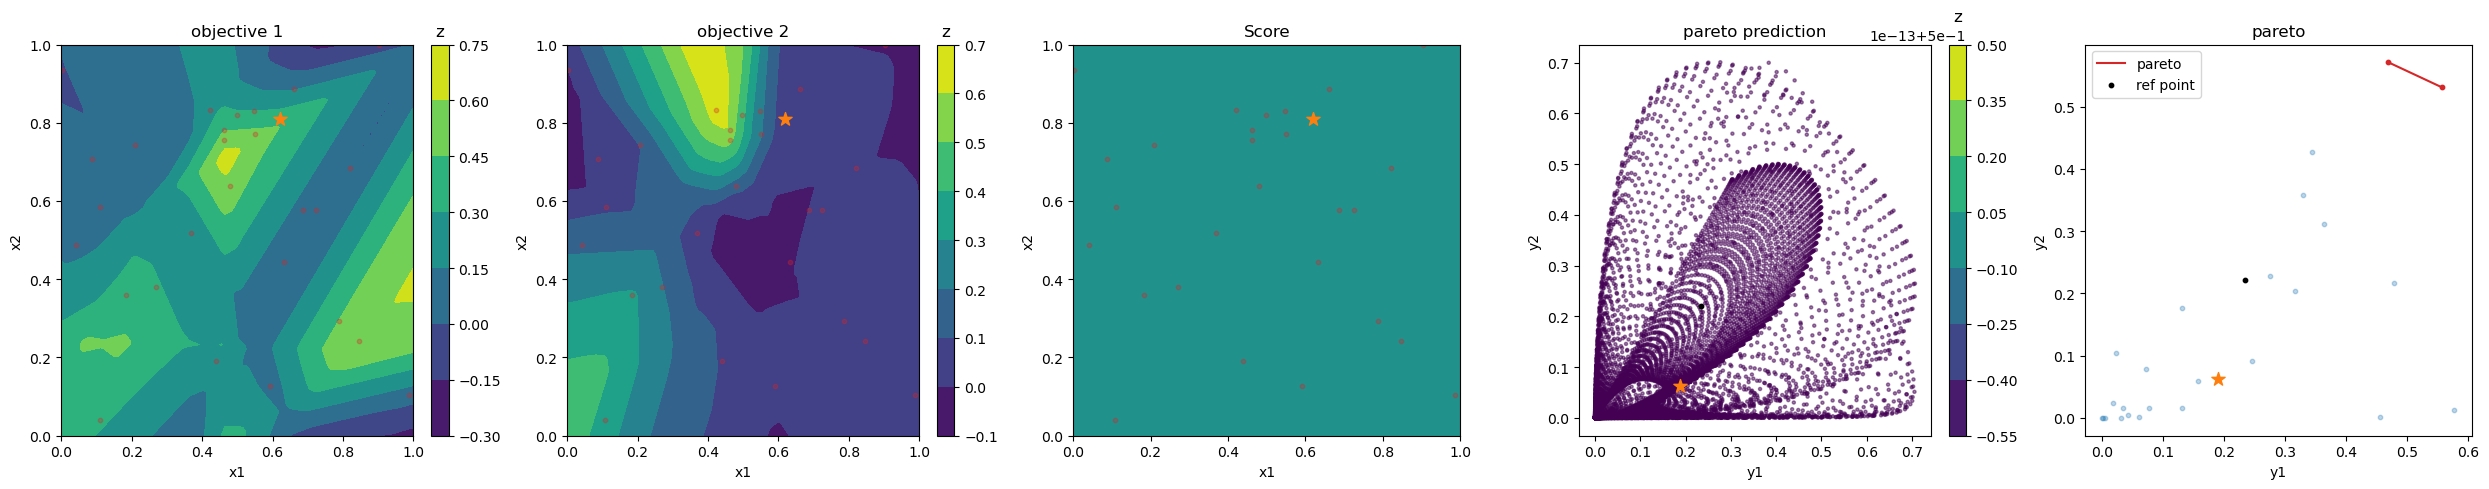

Iteration 8
tau: -0.0


2024-07-12 14:57:48,653 | Model fitting takes 8.38s
2024-07-12 14:57:49,934 | Optimizing the acquisition function takes 1.28s


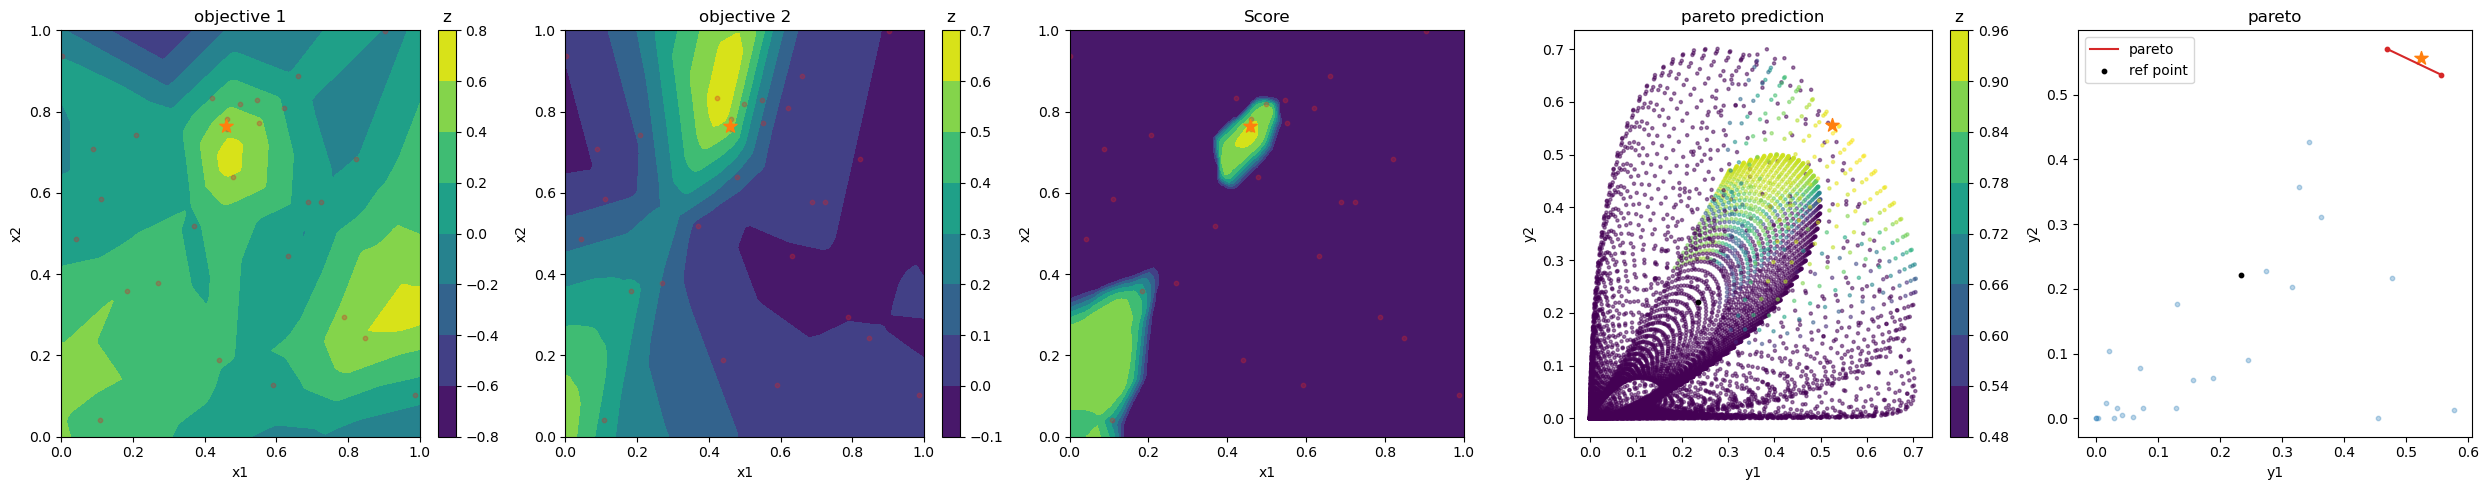

Iteration 9
tau: -0.0


2024-07-12 14:57:58,750 | Model fitting takes 7.19s
2024-07-12 14:58:00,418 | Optimizing the acquisition function takes 1.67s


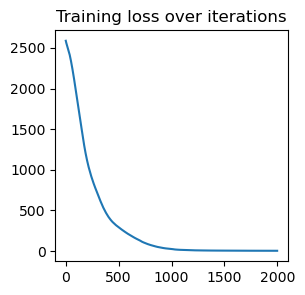

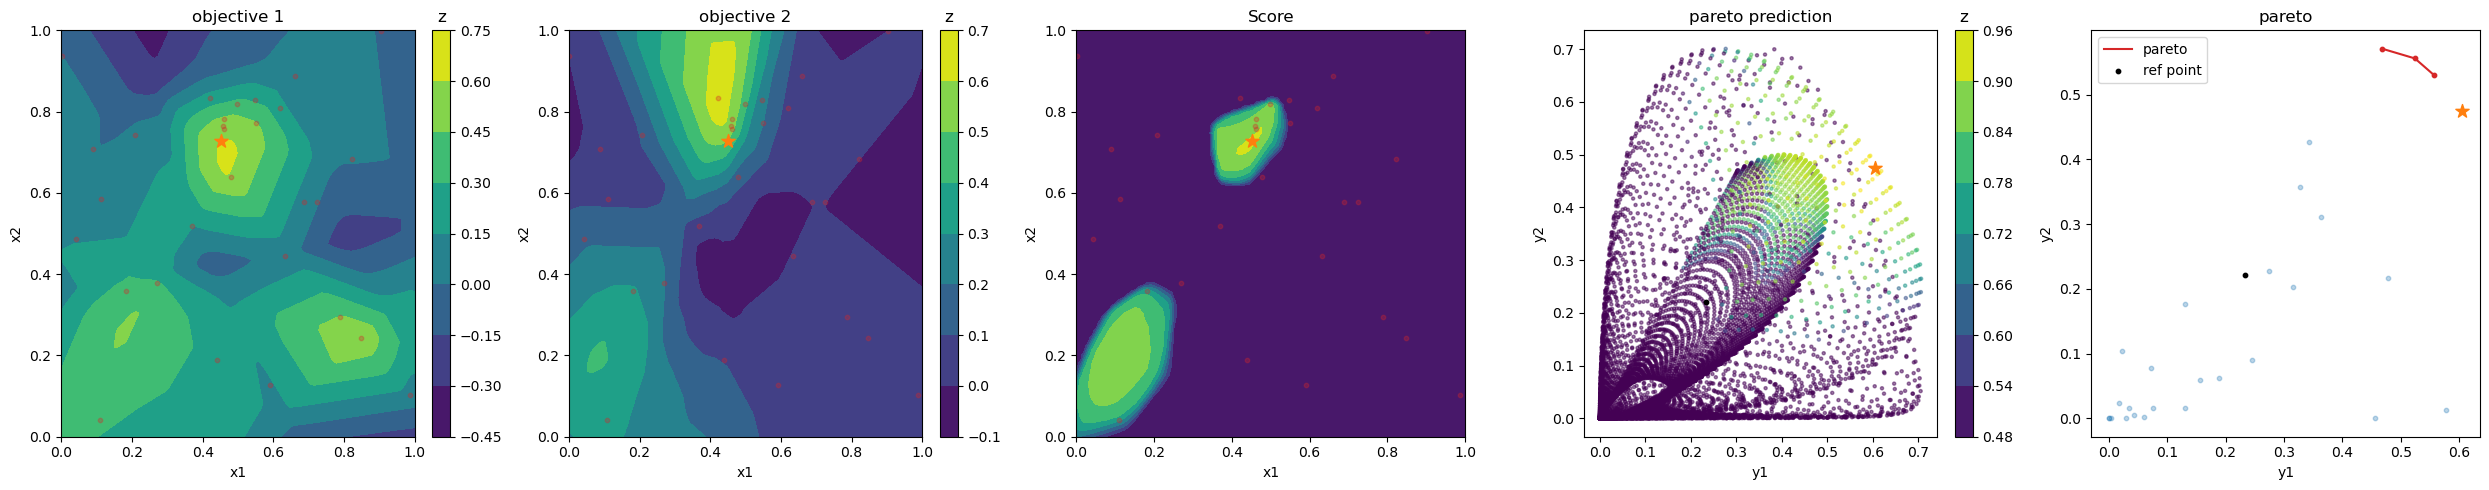

Iteration 10
tau: 0.0


2024-07-12 14:58:11,985 | Model fitting takes 9.26s
2024-07-12 14:58:12,011 | Optimizing the acquisition function takes 0.02s


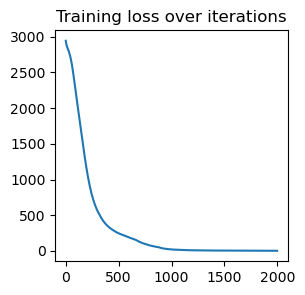

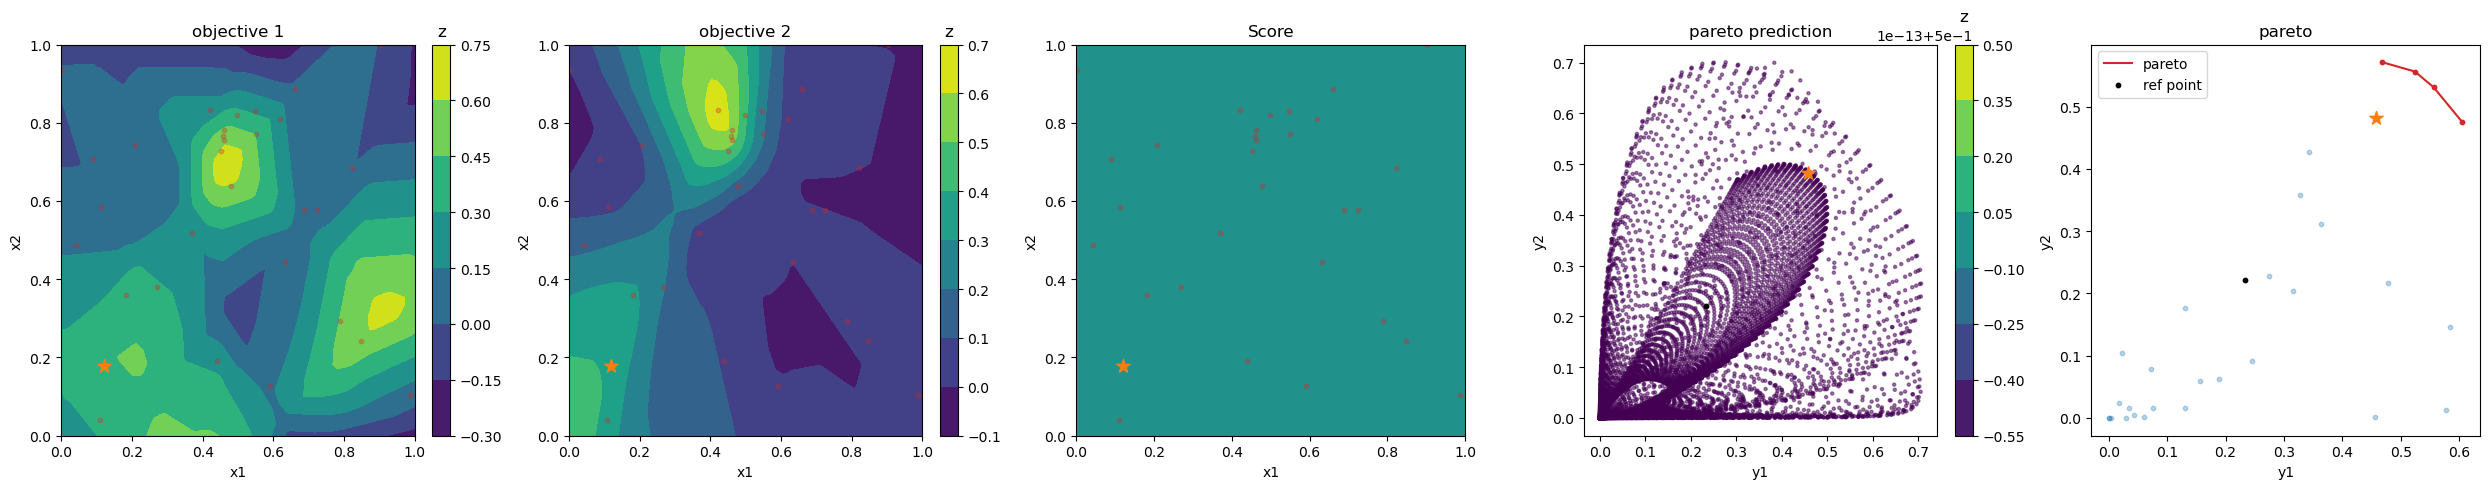

Iteration 11
tau: -0.0


2024-07-12 14:58:21,504 | Model fitting takes 8.08s
2024-07-12 14:58:21,523 | Optimizing the acquisition function takes 0.02s


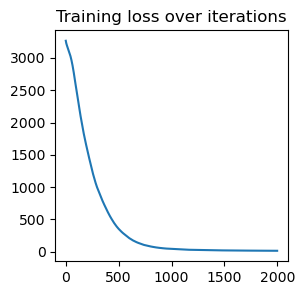

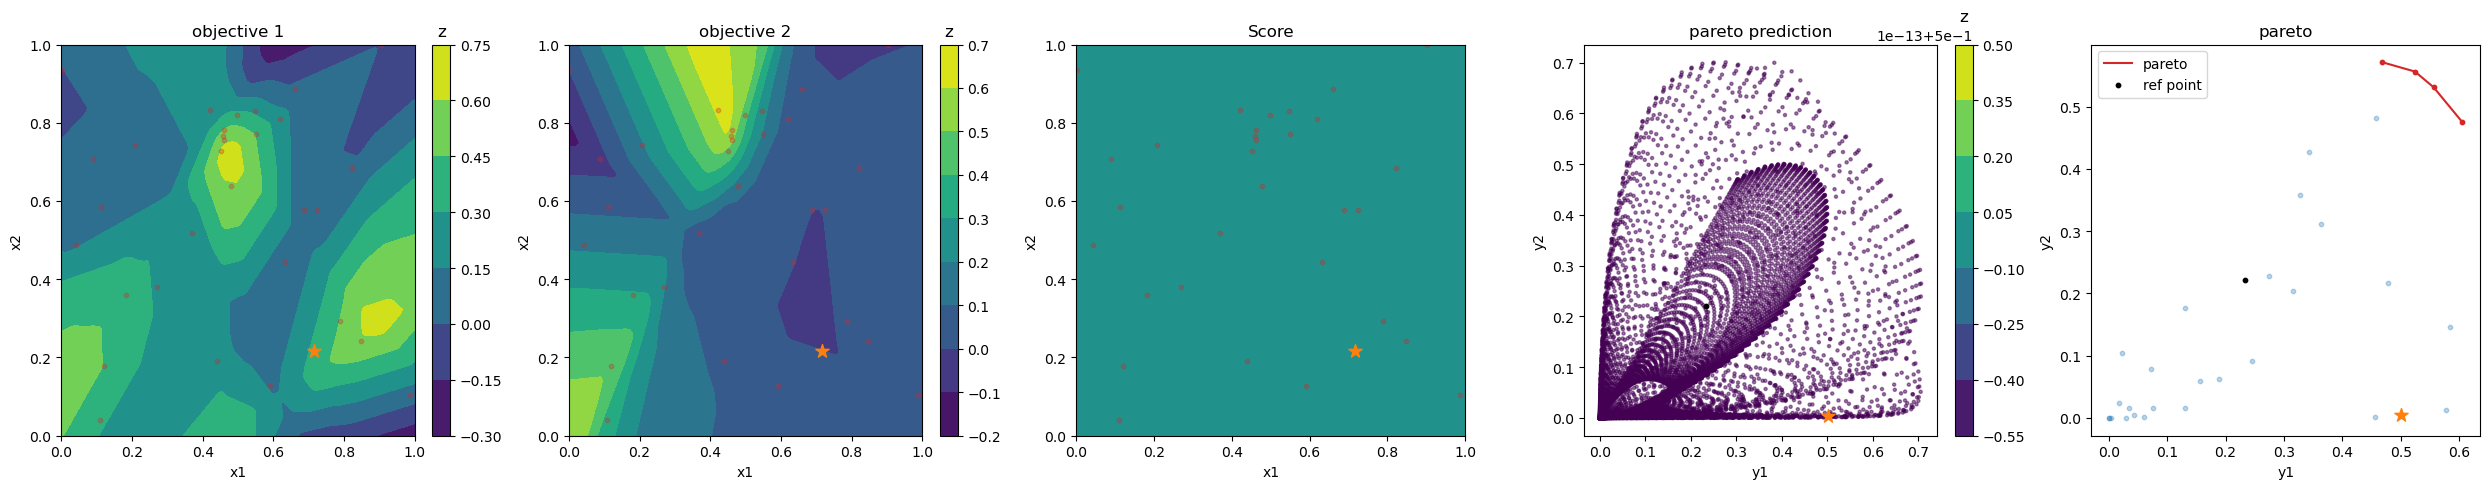

Iteration 12
tau: -0.0


2024-07-12 14:58:30,933 | Model fitting takes 7.70s
2024-07-12 14:58:31,774 | Optimizing the acquisition function takes 0.84s


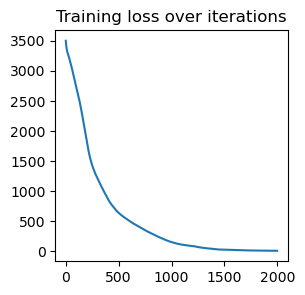

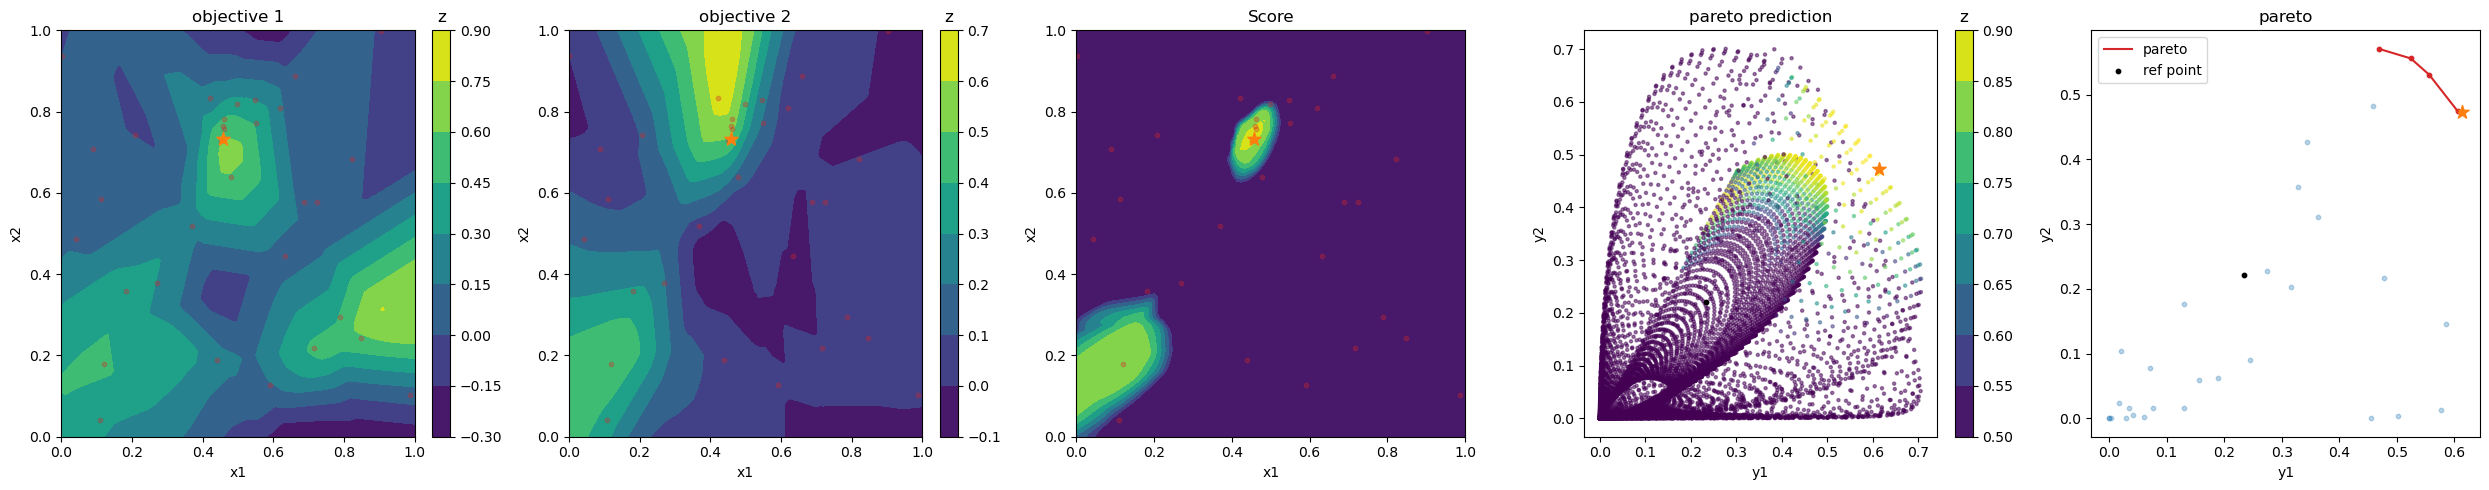

Iteration 13
tau: 0.00011438027287867942


2024-07-12 14:58:40,660 | Model fitting takes 7.44s
2024-07-12 14:58:40,681 | Optimizing the acquisition function takes 0.02s


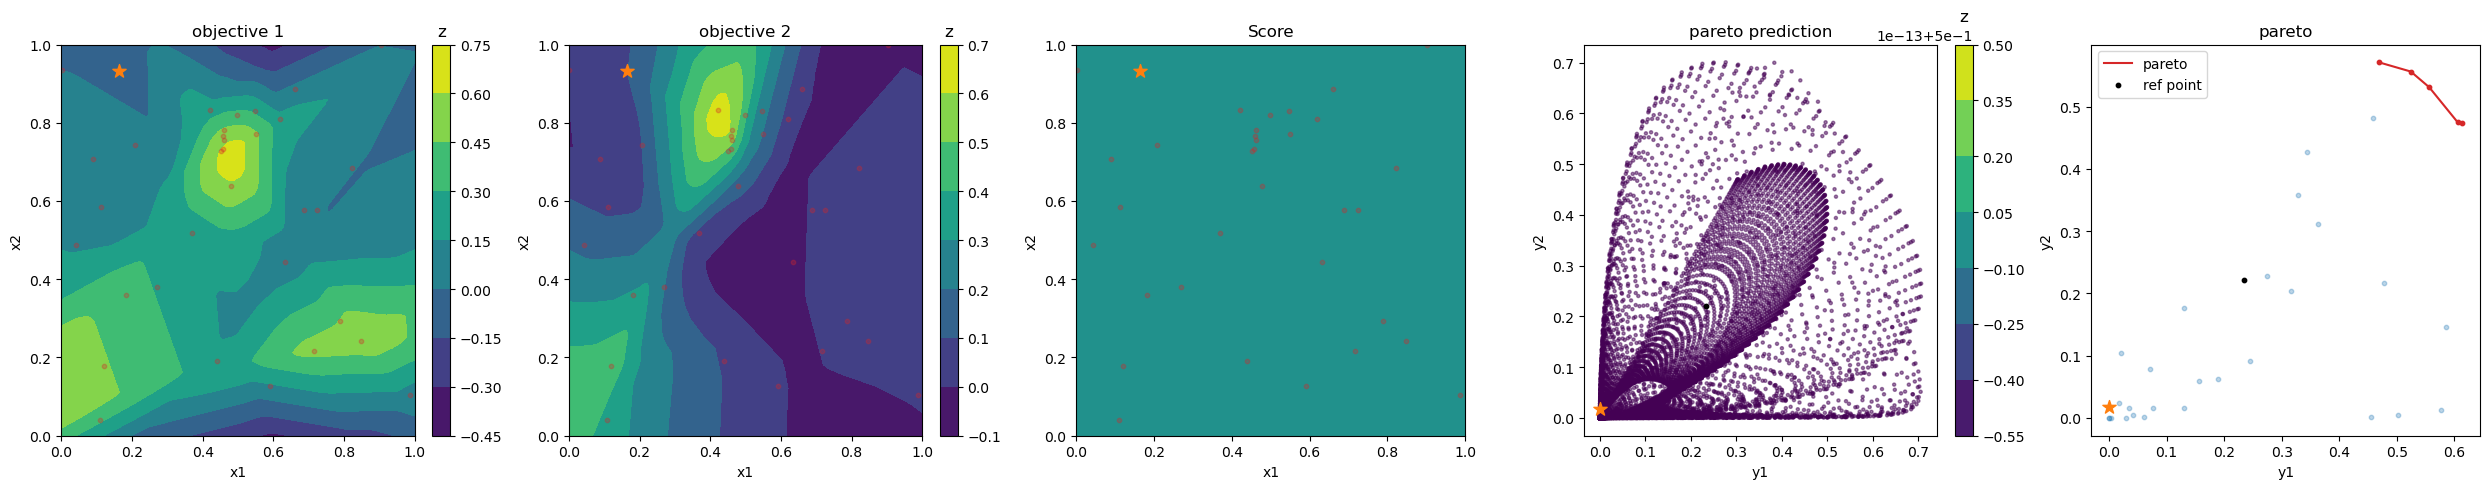

Iteration 14
tau: 2.859506821966973e-05


2024-07-12 14:58:49,904 | Model fitting takes 7.76s
2024-07-12 14:58:50,595 | Optimizing the acquisition function takes 0.69s


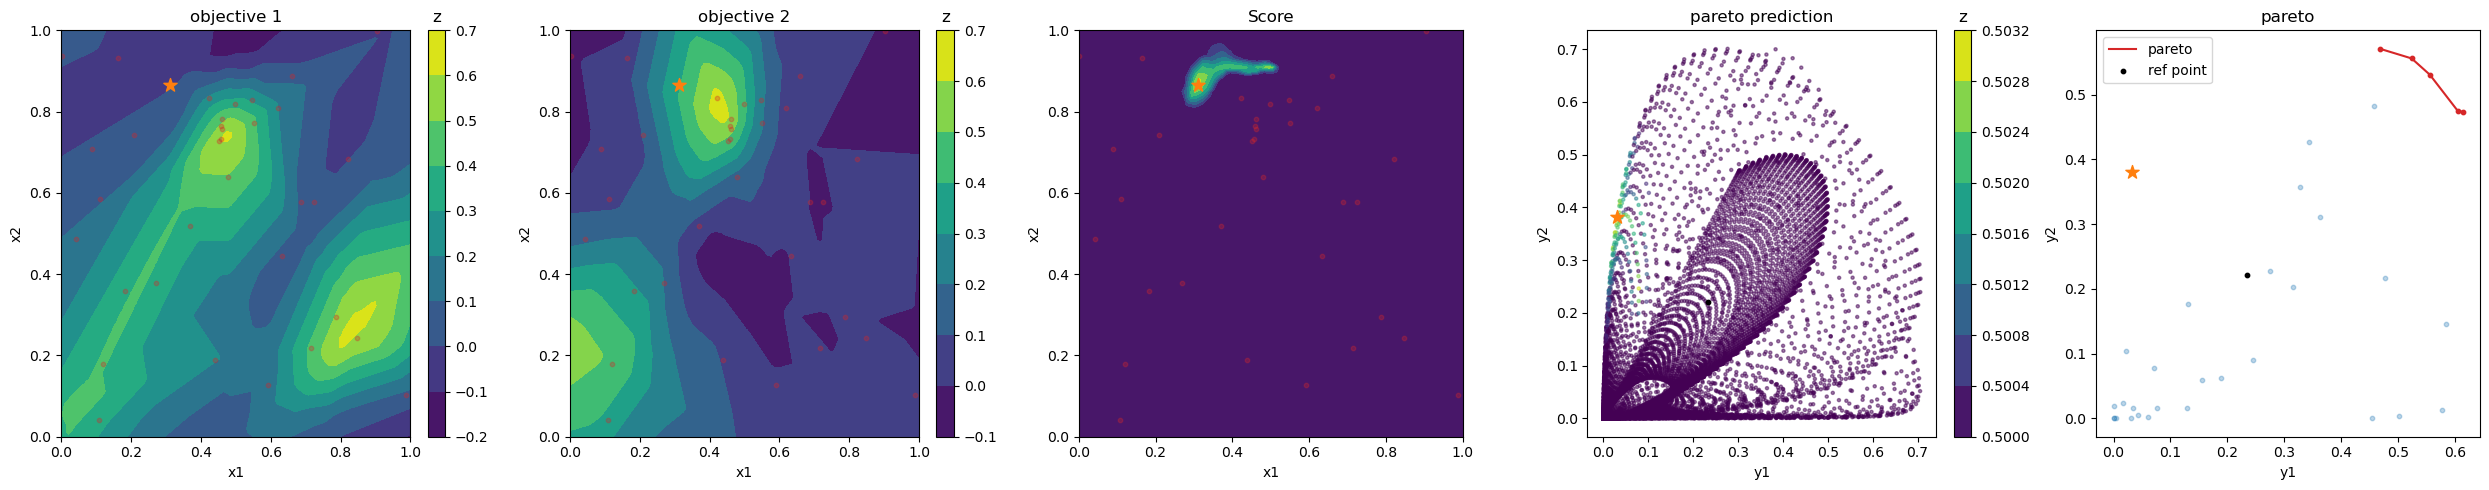

Iteration 15
tau: -0.0


2024-07-12 14:58:59,615 | Model fitting takes 7.59s
2024-07-12 14:59:00,276 | Optimizing the acquisition function takes 0.66s


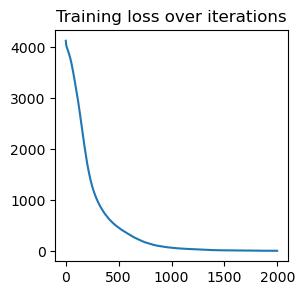

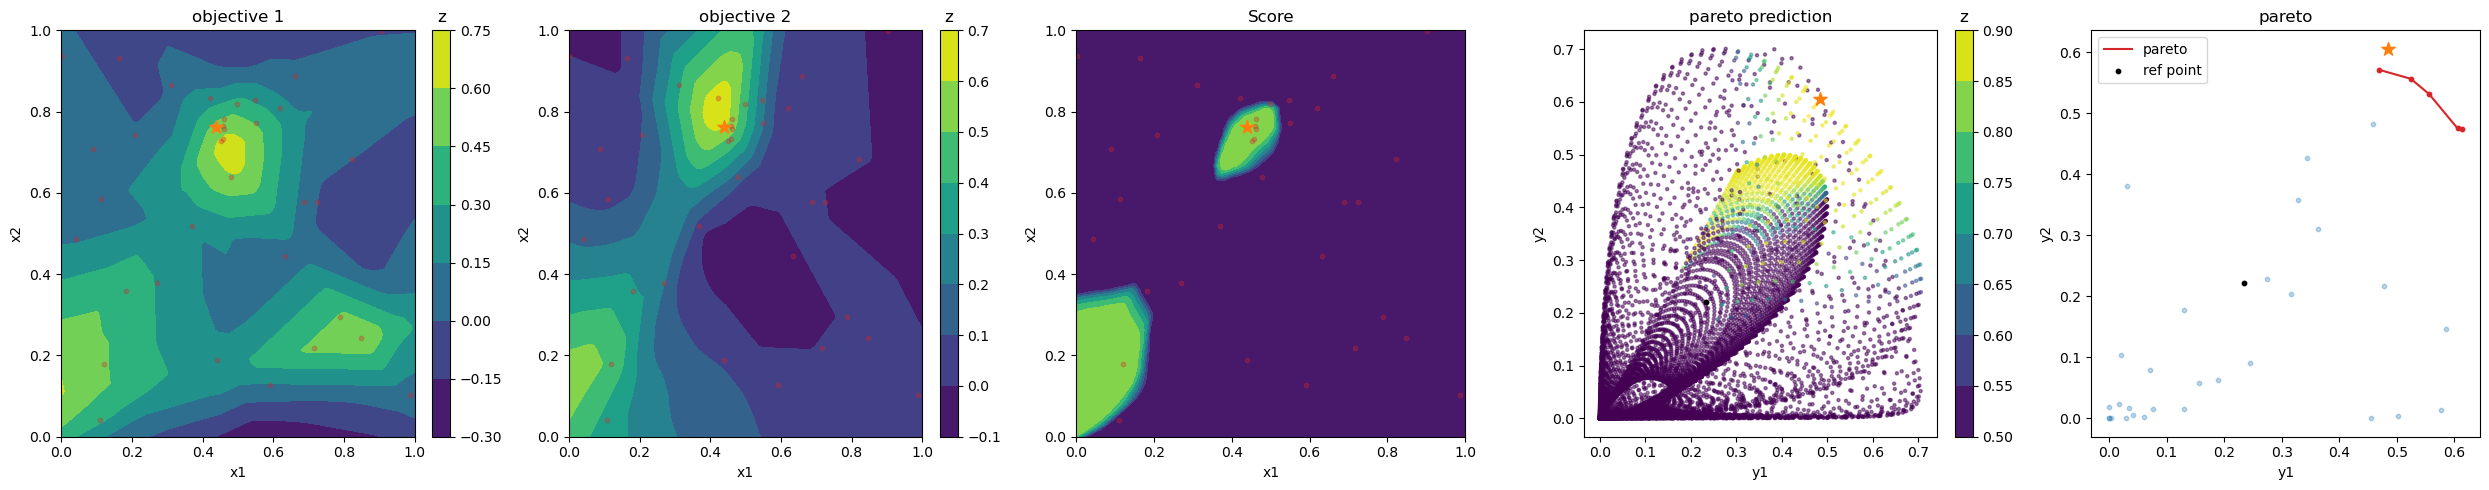

Iteration 16
tau: 0.00014297534109834916


2024-07-12 14:59:09,597 | Model fitting takes 7.93s
2024-07-12 14:59:09,619 | Optimizing the acquisition function takes 0.02s


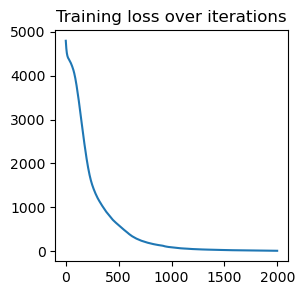

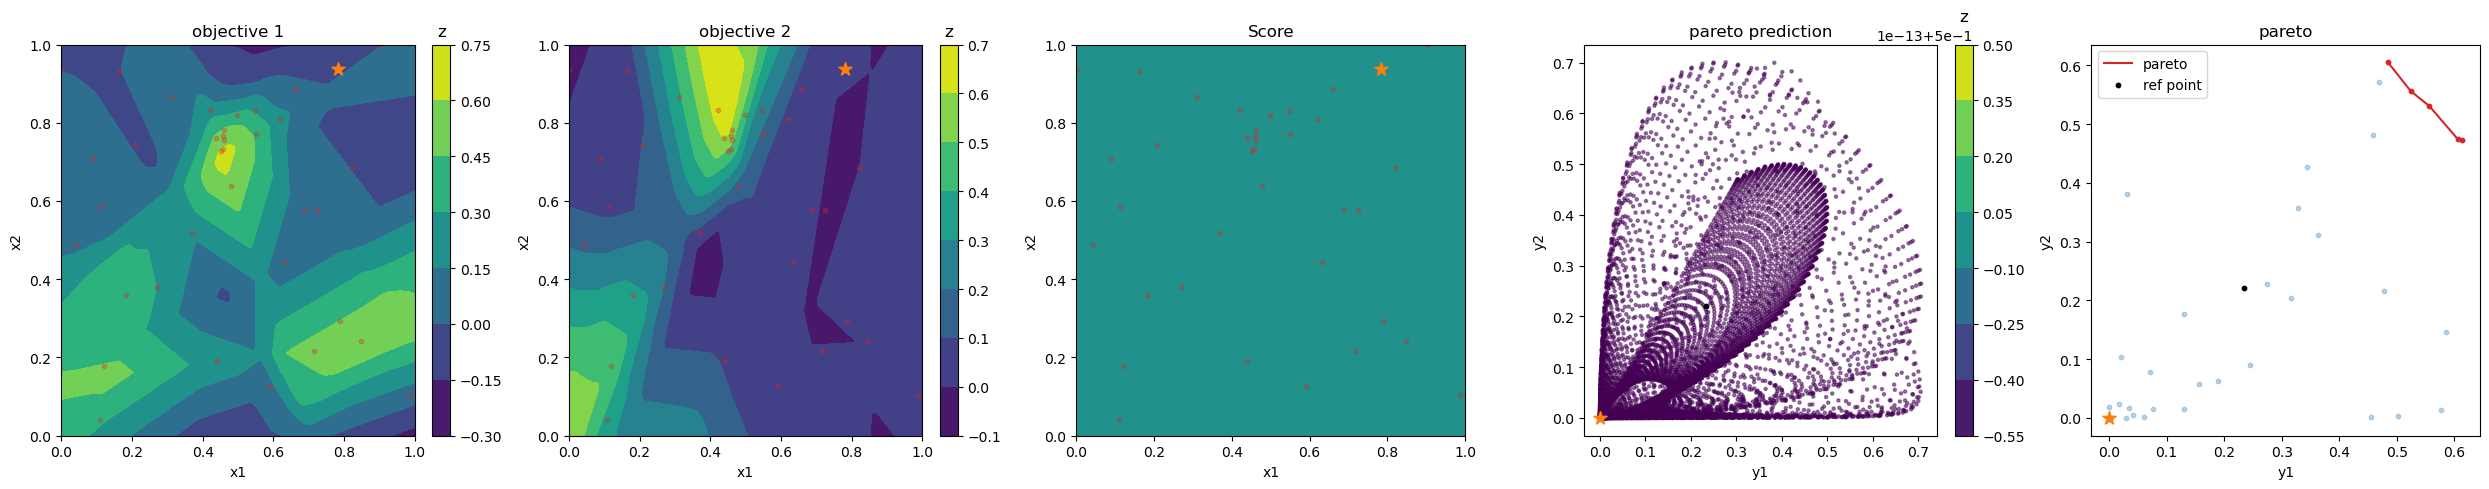

Iteration 17
tau: 5.719013643933997e-05


2024-07-12 14:59:18,683 | Model fitting takes 7.59s
2024-07-12 14:59:18,712 | Optimizing the acquisition function takes 0.03s


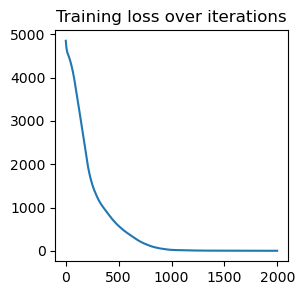

Iteration 18
tau: 0.0002573556139770286


2024-07-12 14:59:27,931 | Model fitting takes 7.57s
2024-07-12 14:59:28,733 | Optimizing the acquisition function takes 0.80s


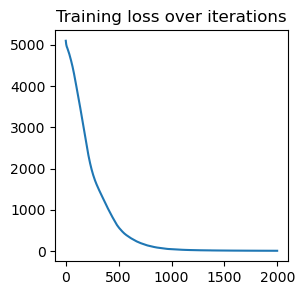

Iteration 19
tau: 0.0079883464120929


2024-07-12 14:59:37,899 | Model fitting takes 7.73s
2024-07-12 14:59:37,917 | Optimizing the acquisition function takes 0.02s


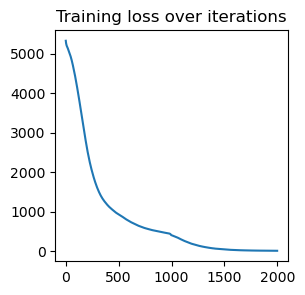

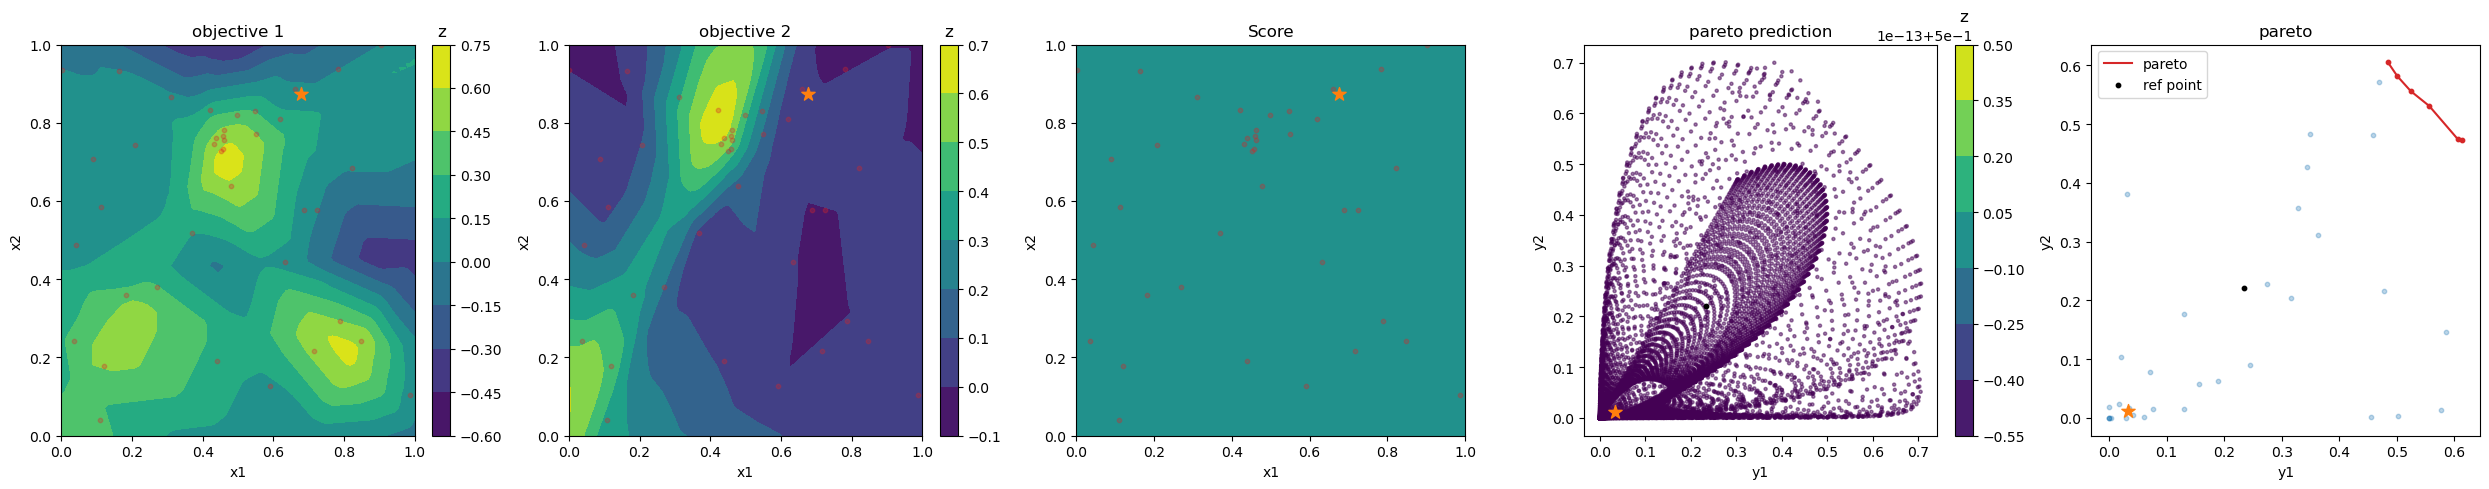

In [9]:
optimizer = MBORE_COMPOSITE(
    problem=problem,
    debug=True
)

x_obs, y_obs = init_x, init_y
for n in range(20):
    print(f"Iteration {n}")

    new_x = optimizer.observe_and_suggest(x_obs, y_obs, gamma=0.3, S=2000)
    new_y = problem(new_x)

    x_obs = torch.cat([x_obs, new_x])
    y_obs = torch.cat([y_obs, new_y])
